In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(777)
 
t = np.arange(10)
 
x_0 = t + 2+ np.random.randn(10)
x_1 = 2*t + 2+ np.random.randn(10)
x_2 = -2*t + 10 + np.random.randn(10)
X = np.vstack((x_0, x_1, x_2))
S = np.cov(X); print(S)
m = np.var(X, axis = 1); print(m)

[[ 10.71923787  18.06322696 -18.01298407]
 [ 18.06322696  36.14284874 -34.64948098]
 [-18.01298407 -34.64948098  35.10659441]]
[ 9.64731408 32.52856387 31.59593497]


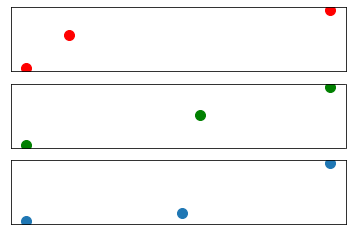

In [3]:
plt.subplot(3,1,1)
plt.scatter(X[:, 0], X[:, 1], s = 100, c = 'r')
plt.xticks([])
plt.yticks([])
plt.subplot(3,1,2)
plt.scatter(X[:, 1], X[:, 2], s = 100,c = 'g')
plt.xticks([])
plt.yticks([])
plt.subplot(3,1,3)
plt.scatter(X[:, 2], X[:, 0], s = 100)
plt.xticks([])
plt.yticks([])
plt.show()

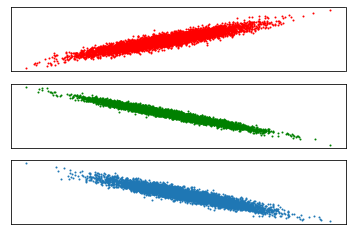

In [4]:
num_points = 6000

X = np.random.multivariate_normal(m, S, num_points)
plt.subplot(3,1,1)
plt.scatter(X[:, 0], X[:, 1], s = 1, c = 'r')
plt.xticks([])
plt.yticks([])
plt.subplot(3,1,2)
plt.scatter(X[:, 1], X[:, 2], s = 1,c = 'g')
plt.xticks([])
plt.yticks([])
plt.subplot(3,1,3)
plt.scatter(X[:, 2], X[:, 0], s = 1)
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
def remove_dots_by_rule (X):
    d = np.array([0.5,0.6,0.8]).dot(S[0][0]+S[1][1]+S[2][2]); d = d.dot(d); X1 = np.array([[0,0,0]]); X2 =  np.array([[0,0,0]]);
    epsilon = 0.5*d
    for i in range (len(X)):
        X_ =  X-m;
        if (X_[i]).dot(S.dot(X_[i].T)) >= d + epsilon: X1 = np.vstack((X1, X_[i]));
        if (X_[i]).dot(S.dot(X_[i].T)) <= d - epsilon: X2 = np.vstack((X2, X_[i]))                                                                          
    return  X1[1:,:],X2[1:,:]           

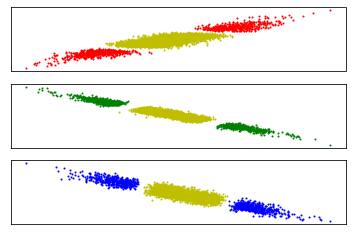

961 3465


In [6]:
X1,X2 = remove_dots_by_rule (X)


plt.subplot(3,1,1)
plt.scatter(X1[:, 0], X1[:, 1], s = 1, c = 'r');plt.scatter(X2[:, 0], X2[:, 1], s = 1, c = 'y')
plt.xticks([])
plt.yticks([])
plt.subplot(3,1,2)
plt.scatter(X1[:, 1], X1[:, 2], s = 1,c = 'g');plt.scatter(X2[:, 1], X2[:, 2], s = 1,c = 'y')
plt.xticks([])
plt.yticks([])
plt.subplot(3,1,3)
plt.scatter(X1[:, 2], X1[:, 0], s = 1, c = 'b');plt.scatter(X2[:, 2], X2[:, 0], s = 1, c = 'y')
plt.xticks([])
plt.yticks([])
plt.show()

print(len(X1),len(X2))

In [7]:
def ksi(x):
    a = np.array([])
    #indexes = np.array([])
    for i in range(3):
        for j in range(3):
            a = np.append(a,x[i]*x[j])
            #indexes = np.append(indexes,f'{i},{j}')
    for _ in range(3):
        for i in range(3):
            a = np.append(a,x[i])
            #indexes = np.append(indexes,f'{i}')
    #print(indexes)
    a = np.append(a,1)
    return a

In [8]:
def find_k(A,m):
    k = 0
    for i in range(3):
        for j in range(3):
            k += A[i][j]*m[i]*m[j]
    return k
k = find_k(S,m)
    

In [9]:
def eta (A,m):
    a = np.array([])
    #indexes = np.array([])
    for i in range(3):
        for j in range(3):
            a = np.append(a,A[i][j])
            #indexes = np.append(indexes,f'{i},{j}')
    for i in range(3):
        for _ in range(3):
            a = np.append(a,m[i])
            #indexes = np.append(indexes,f'{i}')
    #print(indexes)
    a = np.append(a,k)
    return a

In [10]:
np.zeros((1,19))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]])

In [11]:
X_for_perceptron = np.concatenate ((X1,-X2))
X_for_perceptron

array([[ -4.53202086,  -8.40797444,   8.8063245 ],
       [  6.50240357,  11.71809691, -12.17078863],
       [  5.42999112,   7.90475582,  -8.50424688],
       ...,
       [ -0.19010755,   0.65979332,   0.04903333],
       [ -1.00868226,  -1.50282452,   2.33506799],
       [  3.05606477,   0.99456269,  -1.20648533]])

In [12]:
X_for_test = np.concatenate ((X1,X2))
X_for_test

array([[ -4.53202086,  -8.40797444,   8.8063245 ],
       [  6.50240357,  11.71809691, -12.17078863],
       [  5.42999112,   7.90475582,  -8.50424688],
       ...,
       [  0.19010755,  -0.65979332,  -0.04903333],
       [  1.00868226,   1.50282452,  -2.33506799],
       [ -3.05606477,  -0.99456269,   1.20648533]])

In [13]:
def X_to_ksi_X (X):
    a = np.zeros(19)
    for i in range(len(X)):
        a = np.vstack((a,ksi(X[i])))
    return a[1:,:]
KSI = X_to_ksi_X (X_for_perceptron)
print(KSI[1])

[  42.28125213   76.19579511  -79.13937936   76.19579511  137.31379511
 -142.61848055  -79.13937936 -142.61848055  148.12809577    6.50240357
   11.71809691  -12.17078863    6.50240357   11.71809691  -12.17078863
    6.50240357   11.71809691  -12.17078863    1.        ]


In [14]:
def show_results (X,S,m):
    d = np.array([0.5,0.6,0.8]).dot(S[0][0]+S[1][1]+S[2][2]); d = d.dot(d); X1 = np.array([[0,0,0]]); X2 =  np.array([[0,0,0]]);
    epsilon = 0.5*d
    for i in range (len(X)):
        X_ =  X-m;
        if (X_[i]).dot(S.dot(X_[i].T)) >= d: X1 = np.vstack((X1, X_[i]));
        if (X_[i]).dot(S.dot(X_[i].T)) <= d: X2 = np.vstack((X2, X_[i]))   
            
    X1 = X1[1:,:];X2 = X2[1:,:] 
    plt.subplot(3,1,1)
    plt.scatter(X1[:, 0], X1[:, 1], s = 1, c = 'r');plt.scatter(X2[:, 0], X2[:, 1], s = 1, c = 'y')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(3,1,2)
    plt.scatter(X1[:, 1], X1[:, 2], s = 1,c = 'g');plt.scatter(X2[:, 1], X2[:, 2], s = 1,c = 'y')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(3,1,3)
    plt.scatter(X1[:, 2], X1[:, 0], s = 1, c = 'b');plt.scatter(X2[:, 2], X2[:, 0], s = 1, c = 'y')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    return  X1,X2

In [15]:
def get_S_m (a, L):
    k = 0
    K = np.zeros((a,a))
    #print(a)
    for i in range (a):
        for j in range (a):
            #print(L[k])
            K[i][j] = L[k]
            k+=1
    g = np.zeros(3)
    for i in range (a):
        g[i] = L[k+i*a] 
    return K, g

----------------------------


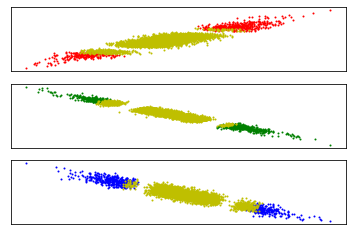

----------------------------


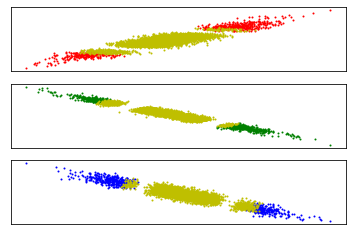

----------------------------


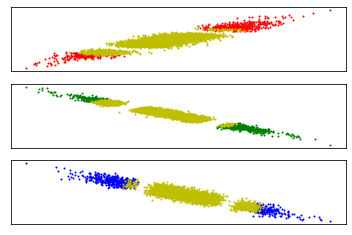

----------------------------


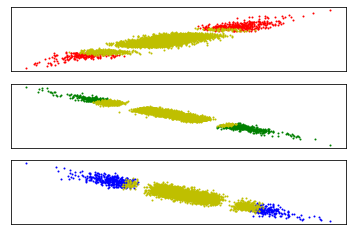

Final-----------------------


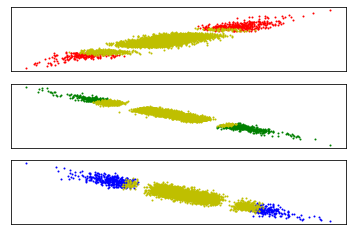

In [16]:
def perceptron(KSI,L = np.zeros(19)):
    for i in range(len(KSI)):
        if np.dot(L,KSI[i])<=0:   L+=KSI[i];print('----------------------------');S,m = get_S_m (3,L); show_results (X_for_test,S,m); return perceptron(KSI,L);
    print('Final-----------------------')
    S,m = get_S_m (3,L); show_results (X_for_test,S,m)
    return L
L = perceptron(KSI)        

In [17]:
def check ():
    indexes = np.array([])
    for i in range(3):
        for j in range(3):
            indexes = np.append(indexes,f'{i},{j}')
    for i in range(3):
        for _ in range(3):
            indexes = np.append(indexes,f'{i}')
    print(indexes)
check ()

['0,0' '0,1' '0,2' '1,0' '1,1' '1,2' '2,0' '2,1' '2,2' '0' '0' '0' '1' '1'
 '1' '2' '2' '2']
